<a href="https://colab.research.google.com/github/AhmetEsatKAYA/Yolo-ile-nesne-tanima/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
print("Hata yoksa kuruldu demektir")

Hata yoksa kuruldu demektir


Evet arkadaşlar, bu şekilde ultralytics'i kurduk şimdi diğer kütüphanelere geçiyoruz



In [ ]:
!pip install opencv-python
import cv2
print("Hata yoksa kuruldu demektir")

Hata yoksa kuruldu demektir


Evet arkadaşlar, bu şekilde opencv'yi de kurduk şimdi diğer kütüphanelere geçiyoruz

In [ ]:
!pip install cvzone
import cvzone
print("Hata yoksa kuruldu demektir")

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=ba331c1056ca9c32f6271d628669ac0154a3be7d64e12c46d1ced889a58c0796
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone
Hata yoksa kuruldu demektir


Evet arkadaşlar, bu şekilde tüm kütüphaneleri kurduk şimdi asıl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  430k  100  430k    0     0  1075k      0 --:--:-- --:--:-- --:--:-- 1074k

0: 352x640 2 cars, 1 truck, 11.8ms
Speed: 2.5ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)


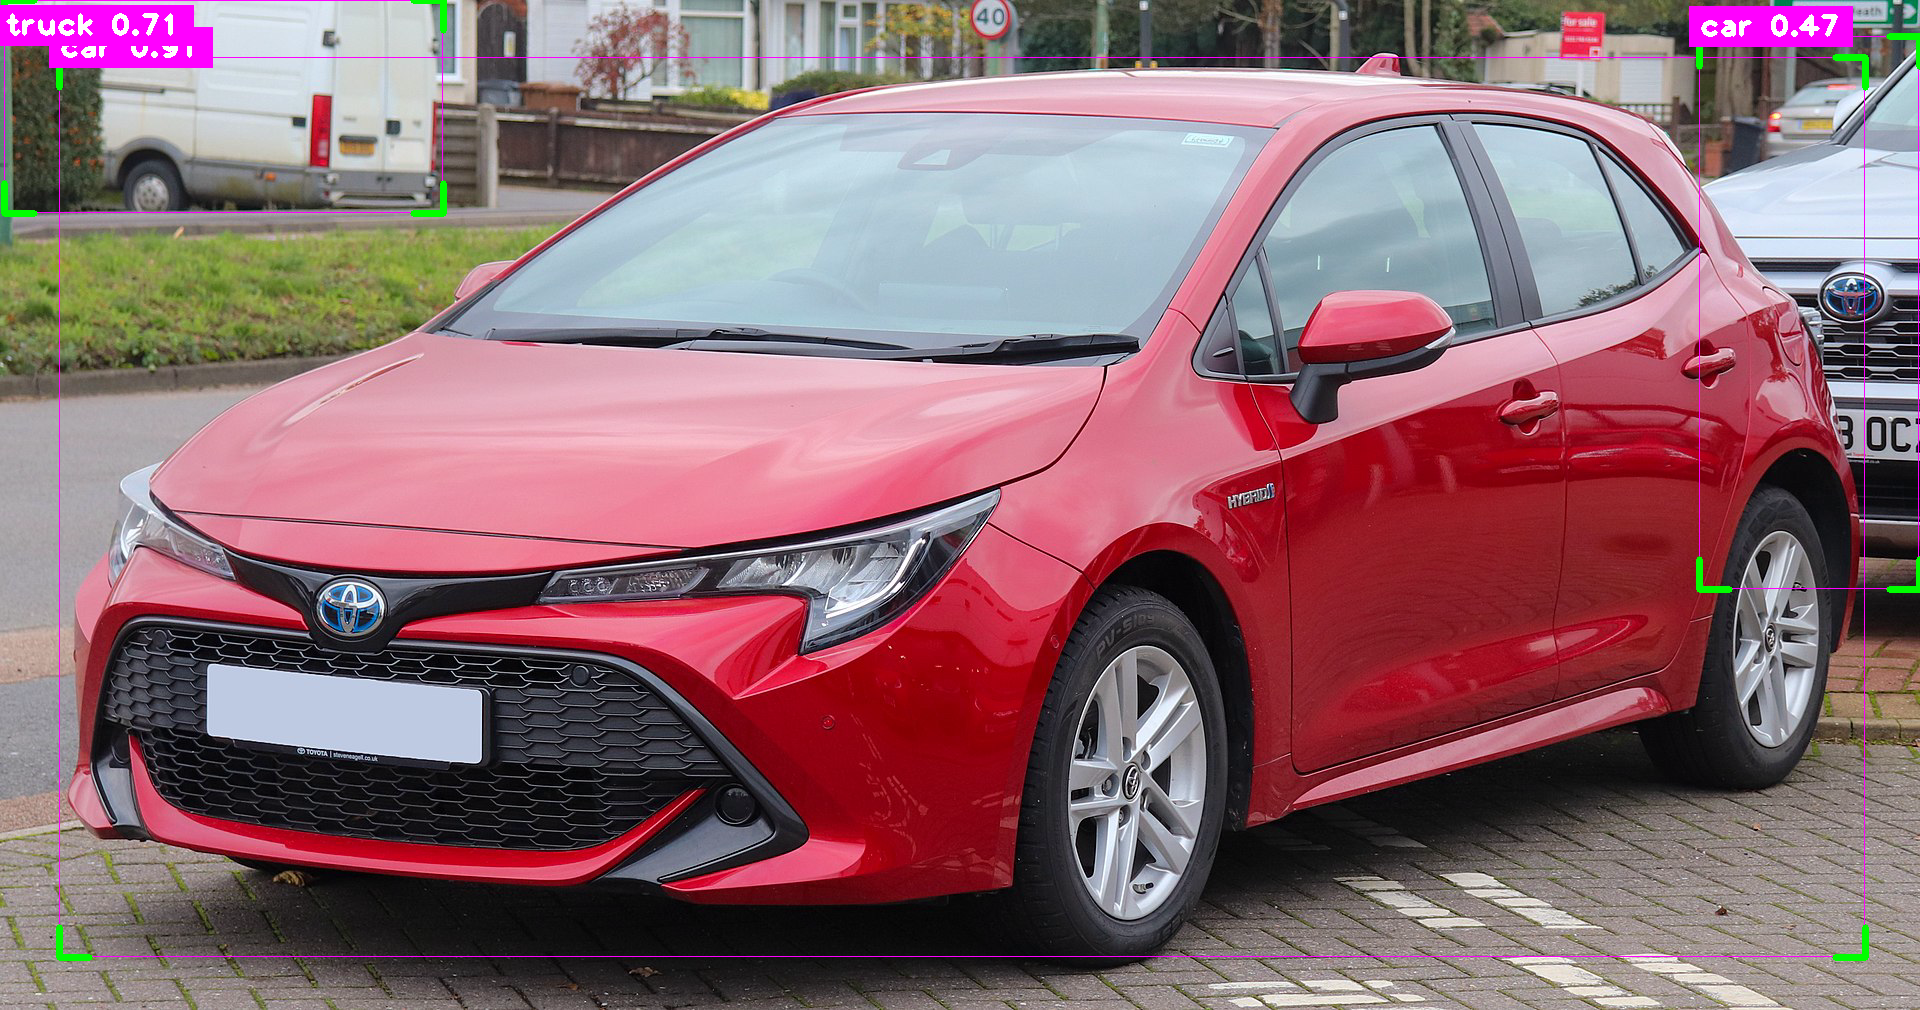

Error reading the image


In [ ]:
!curl -o logo.png https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/2019_Toyota_Corolla_Icon_Tech_VVT-i_Hybrid_1.8.jpg/1920px-2019_Toyota_Corolla_Icon_Tech_VVT-i_Hybrid_1.8.jpg
!pip install ultralytics
import ultralytics
from ultralytics import YOLO
import cv2
import cvzone
import math
from google.colab.patches import cv2_imshow
import numpy

cap = cv2.VideoCapture('logo.png')
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

model = YOLO('../YOLO Weights/yolov8n.pt')

classNames = ["person",
"bicycle",
"car",
"motorbike",
"aeroplane",
"bus",
"train",
"truck",
"boat",
"traffic light",
"fire hydrant",
"stop sign",
"parking meter",
"bench",
"bird",
"cat",
"dog",
"horse",
"sheep",
"cow",
"elephant",
"bear",
"zebra",
"giraffe",
"backpack",
"umbrella",
"handbag",
"tie",
"suitcase",
"frisbee",
"skis",
"snowboard",
"sports ball",
"kite",
"baseball bat",
"baseball glove",
"skateboard",
"surfboard",
"tennis racket",
"bottle",
"cup",
"fork",
"knife",
"spoon",
"bowl",
"banana",
"apple",
"sandwich",
"orange",
"broccoli",
"carrot",
"hot dog",
"pizza",
"donut",
"cake",
"chair",
"sofa",
"pottedplant",
"bed",
"diningtable",
"toilet",
"tvmonitor",
"laptop",
"mouse",
"remote",
"keyboard",
"cell phone",
"microwave",
"oven",
"toaster",
"sink",
"refrigerator",
"book",
"clock",
"vase",
"scissors",
"teddy bear",
"hair drier",
"toothbrush"]

while True:
    success, img = cap.read()
    if not success:
        print("Error reading the image")
        break

    results = model(img, stream=True)

    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            w, h = x2-x1, y2-y1
            cvzone.cornerRect(img, (x1, y1, w, h))

            conf = math.ceil((box.conf[0]*100))/100

            cls = box.cls[0]
            name = classNames[int(cls)]

            cvzone.putTextRect(img, f'{name} 'f'{conf}', (max(0,x1), max(35,y1)), scale = 2)

    cv2_imshow(img)
    cv2.waitKey(1)

Bu şekilde kodumuzu test ettik